# Using KNN Algorithm to predict if a person will have diabetes or not

### importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### loading the dataset

In [3]:
data = pd.read_csv('diabetes.csv')

In [19]:
data.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0    155.0  33.6   
1             1     85.0           66.0           29.0    155.0  26.6   
2             8    183.0           64.0           29.0    155.0  23.3   
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
5             5    116.0           74.0           29.0    155.0  25.6   
6             3     78.0           50.0           32.0     88.0  31.0   
7            10    115.0           72.0           29.0    155.0  35.3   
8             2    197.0           70.0           45.0    543.0  30.5   
9             8    125.0           96.0           29.0    155.0  32.0   
10            4    110.0           92.0           29.0    155.0  37.6   
11           10    168.0           74.0           29.0    155.0  38.0   
12           10    139.0           80.0           29.0    155.0  27.1   
13            1    189.0           60.0           23.0    846.0  30.1   
14            5    166.0           72.0           19.0    175.0  25.8   
15            7    100.0           72.0           29.0    155.0  30.0   
16            0    118.0           84.0           47.0    230.0  45.8   
17            7    107.0           74.0           29.0    155.0  29.6   
18            1    103.0           30.0           38.0     83.0  43.3   
19            1    115.0           70.0           30.0     96.0  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [6]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [7]:
X = data.iloc[:,0:8]

### extracting dependent variable

In [8]:
y = data.iloc[:,8]

### Explorning data to know relation before processing

<AxesSubplot:>

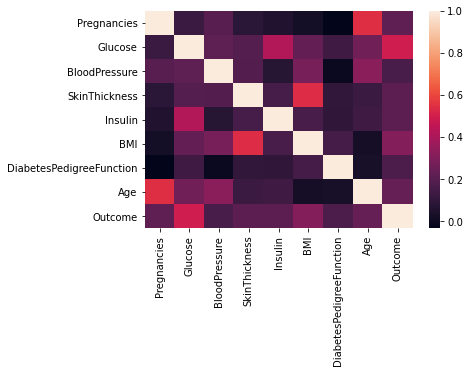

In [9]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Age', ylabel='count'>

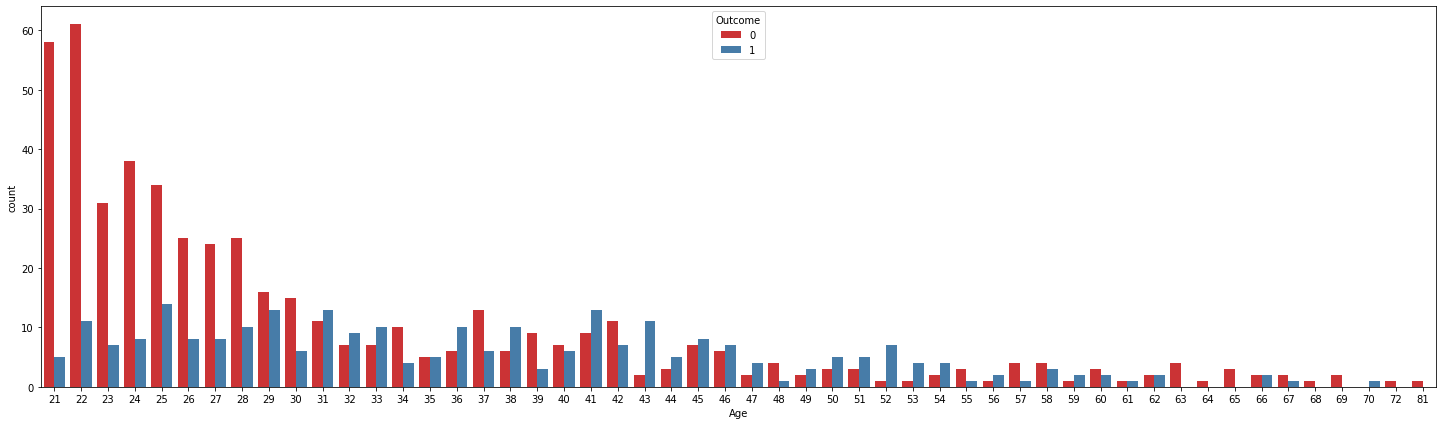

In [10]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

### splitting dataset into training and testing set

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


 ### feature scaling

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### loading model - KNN

In [13]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

### fitting model

In [15]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

### making predictions

In [16]:
y_pred = classifier.predict(X_test)

### evaluating model

In [17]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))


[[94 13]
 [15 32]]
0.6956521739130436


### accuracy


In [18]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182
